### Lab 1: Real-World Data Cleaning, Transformation, and Visualization
17/06/2023
Objective: This exercise aims to provide hands-on experience with real-world data
preprocessing and visualization. The goal is to understand the challenges of
cleaning, transforming, and visualizing data to derive valuable insight

In [1]:
#importing libraries
!pip install missingno 
import missingno as msno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

In [2]:
#loading dataset
data = sns.load_dataset('titanic')


### Understanding the dataset


In [3]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [5]:
#Displaying all available rows and columns in the dataset
data.shape


(891, 15)

In [6]:
#Metadata of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


From the above display of the metadata of the dataset, most of the features have very few NaN values (apart from deck). We will attempt at cleaning this dataset to a form suitable for analysis in the next section.¶


In [7]:
data.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

## DATA CLEANING AND TRANSFORMATION

<AxesSubplot:>

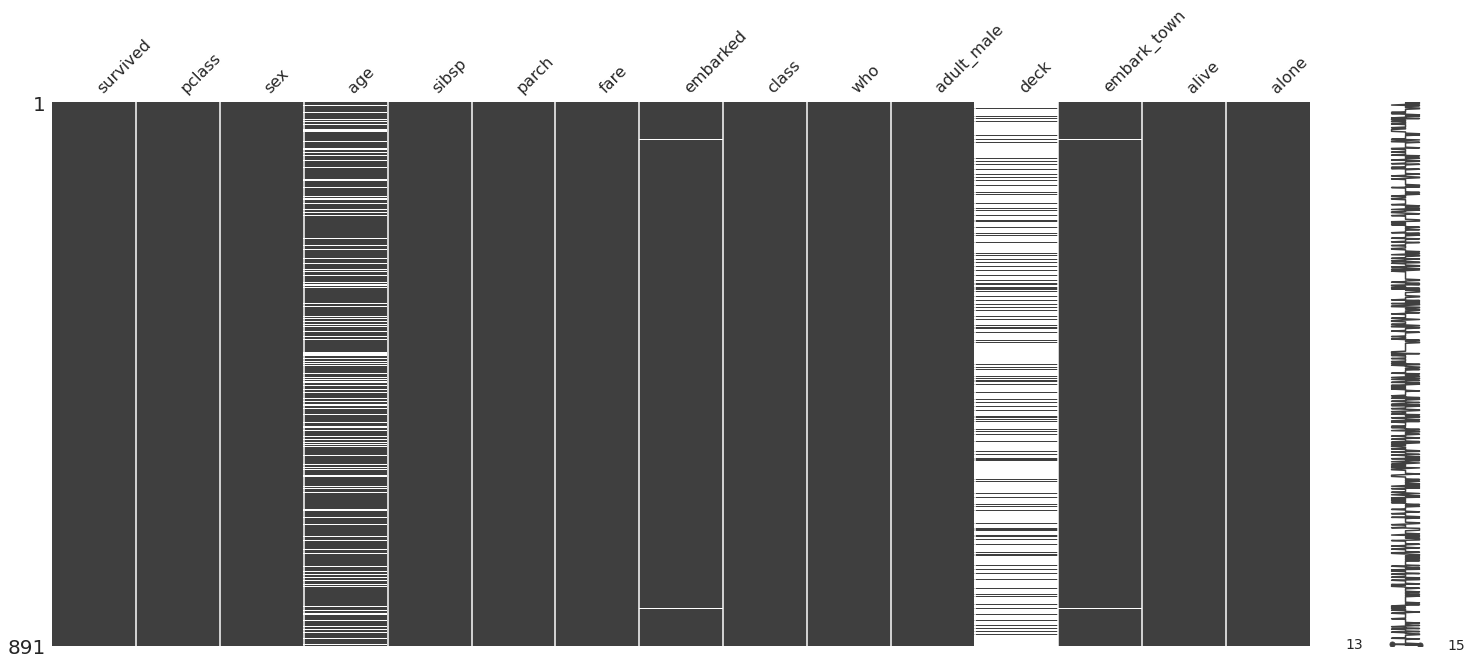

In [8]:

#using missingno to visualise the missing values in the dataset
msno.matrix(data)

From the diagram above, more than 80% of the data in the deck is missing. Hence we will have to drop the column when cleaning the data.

In [9]:
data = data.drop(["deck"] , axis =1)

In [10]:
data.shape

(891, 14)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


### Checking for null values

In [12]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [13]:
mean_age =data['age'].mean()
data['age'].fillna(mean_age , inplace = True)

In [14]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [15]:
data.shape

(891, 14)

In [16]:
data = data.dropna(subset=['embarked','embark_town'])
data.shape


(889, 14)

In [17]:
#Converting the fare columns to log scale

data['natural_log'] = np.log10(data['fare'])

data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,natural_log
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,0.860338
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,1.852988
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0.898999
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,1.725095
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,0.905796


### FEATURE ENGINEERING

In [18]:
data.describe()

,survived,pclass,age,sibsp,parch,fare,natural_log
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681,-inf
std,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504,NaN
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,-inf
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.897396
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.159994
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.491362
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,2.709549


In [19]:

#add a new column in the dataframe name 'Family_size'
data['Family_Size'] = data['sibsp'] + data['parch']

In [20]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,natural_log,Family_Size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,0.860338,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,1.852988,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0.898999,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,1.725095,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,0.905796,0


### Data Visualisation

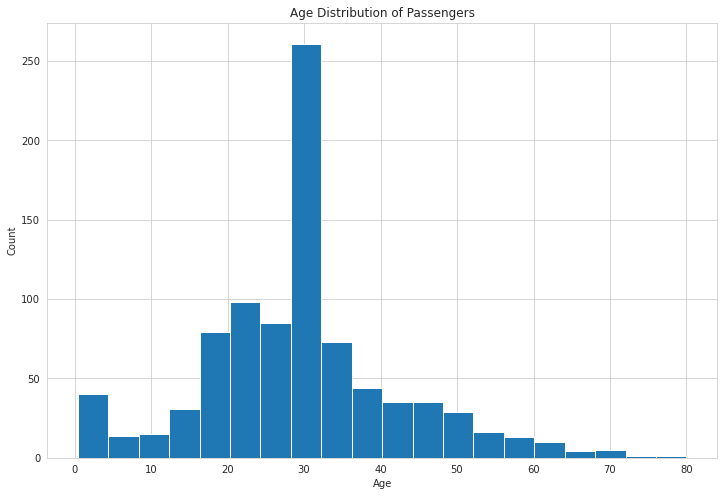

In [25]:
# Plot histogram of age distribution

plt.figure(figsize = (12,8))
plt.hist(data['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Passengers')
plt.show()


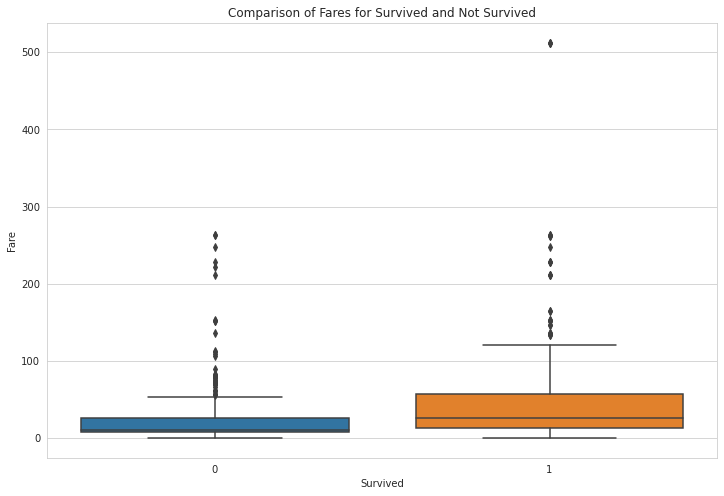

In [28]:
# Box plot of fares for passengers who survived and who did not
plt.figure(figsize = (12,8))
sns.boxplot(x='survived', y='fare', data=data)

plt.xlabel('Survived')
plt.ylabel('Fare')
plt.title('Comparison of Fares for Survived and Not Survived')
plt.show()


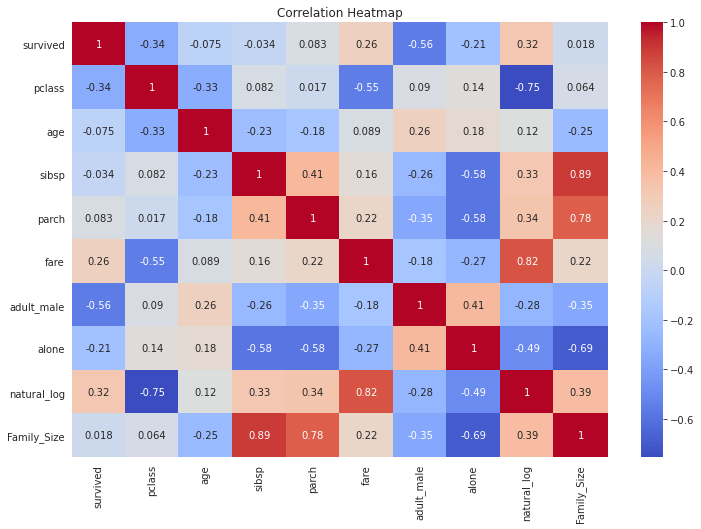

In [29]:
# Compute the correlation matrix
plt.figure(figsize = (12,8))
correlation_matrix = data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Text(0.5, 1.0, 'Pairwise Relationship between Survived Classes')

<Figure size 864x576 with 0 Axes>

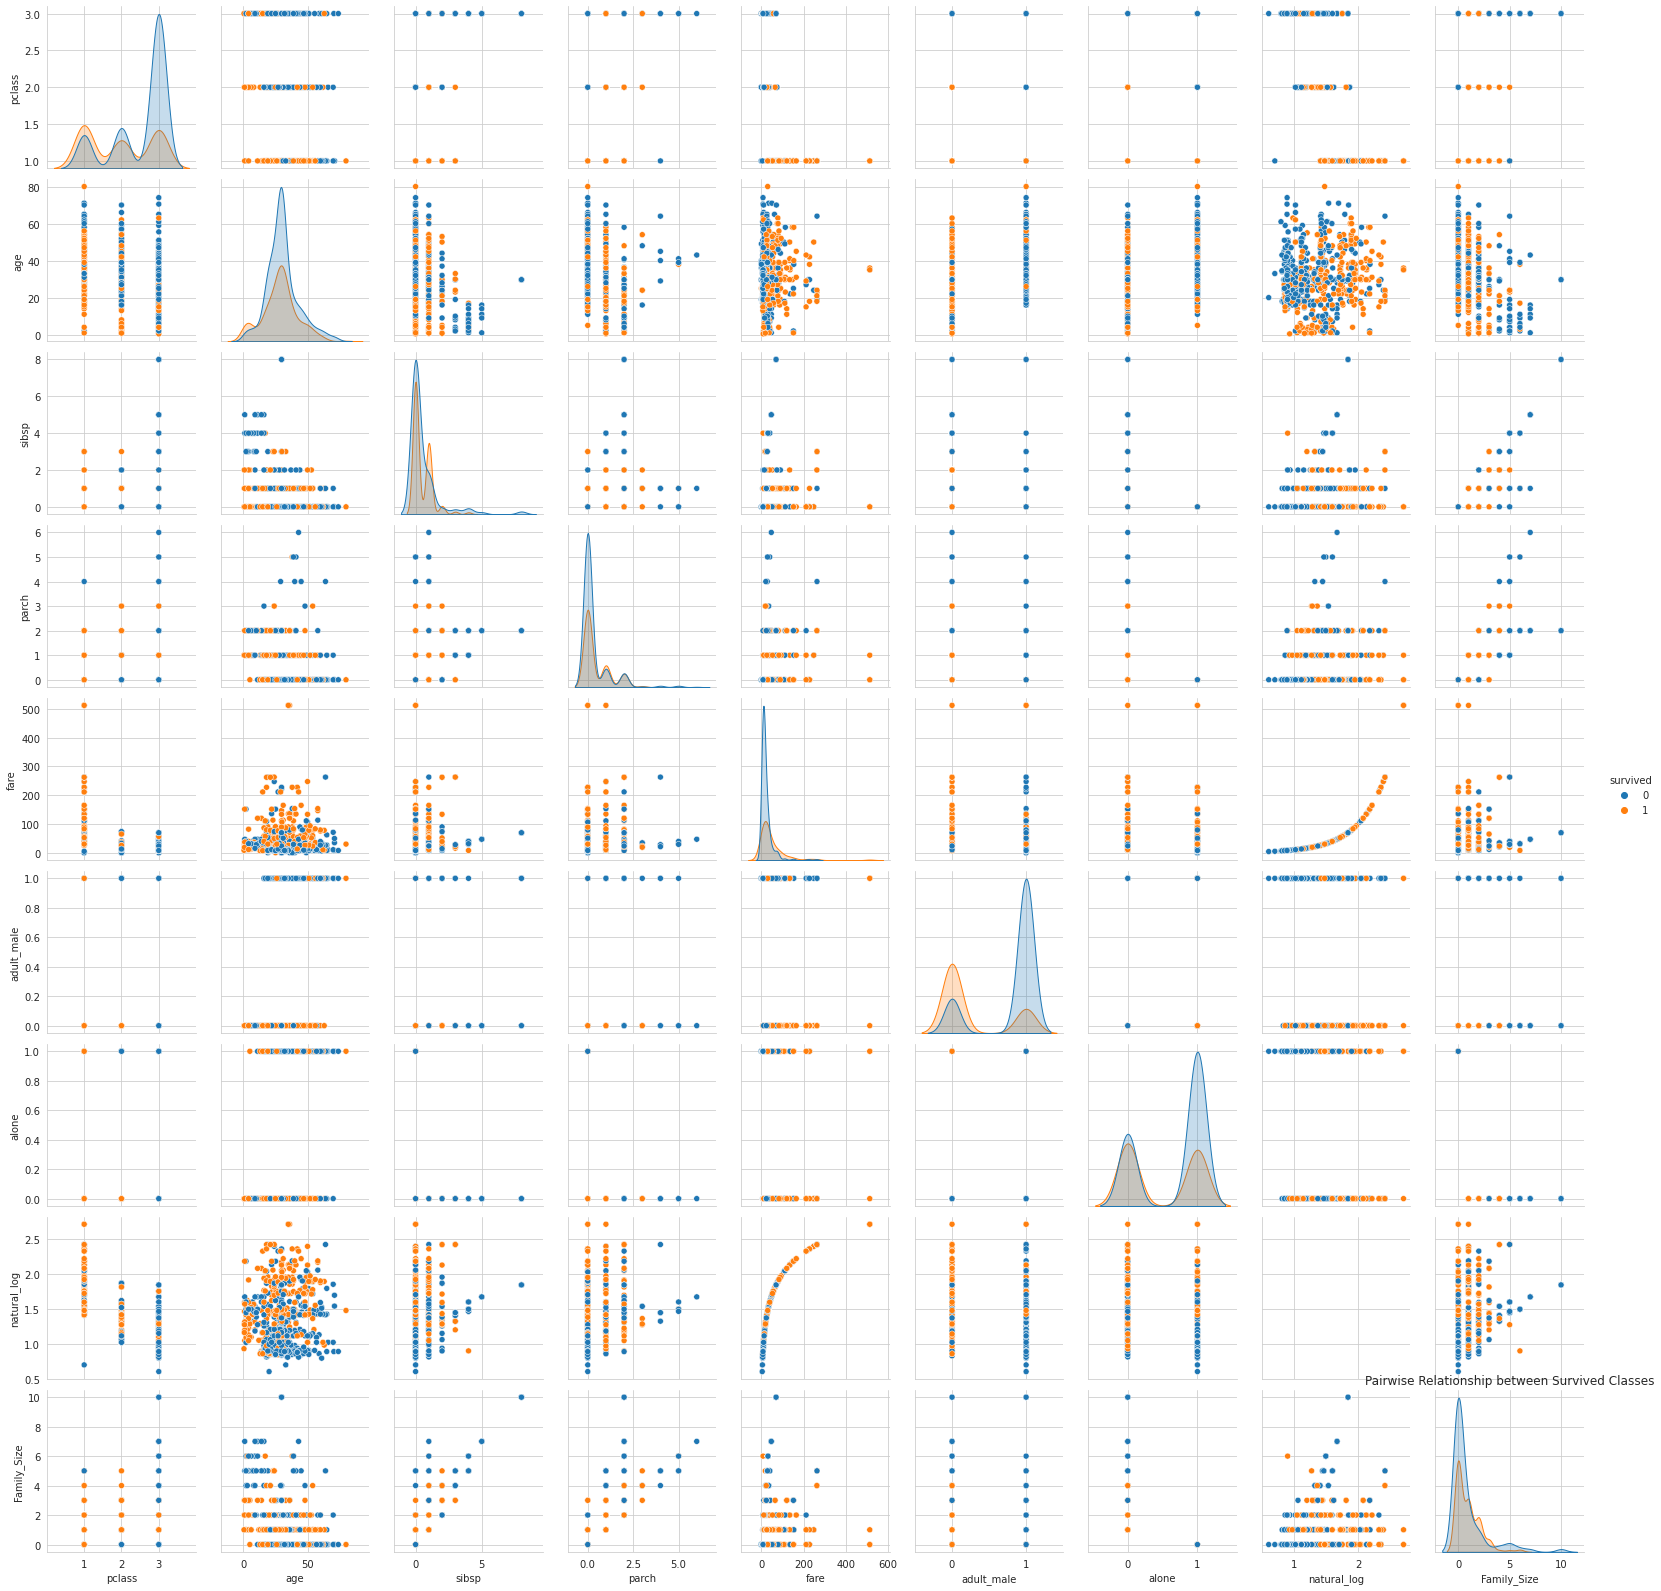

In [31]:
# Pairplot of the pairwise relationship between different classes of 'survived'
plt.figure(figsize = (12,8))

sns.pairplot(data, hue='survived')

plt.title('Pairwise Relationship between Survived Classes')


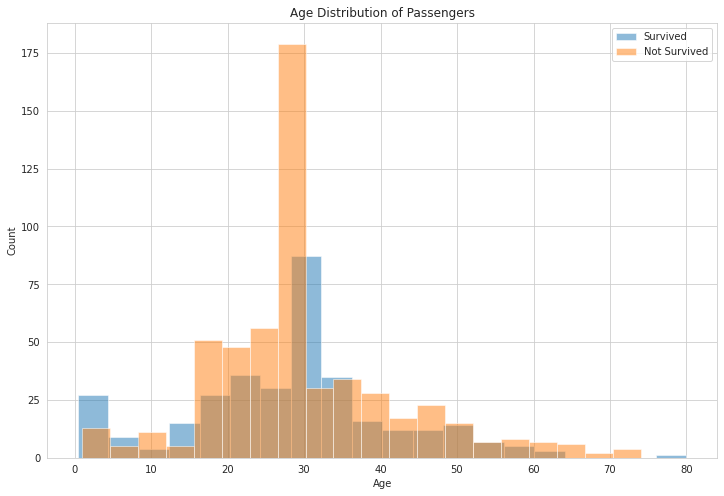

In [32]:
# Plot histogram of age distribution for different classes of passengers
plt.figure(figsize = (12,8))
survived = data[data['survived'] == 1]
not_survived = data[data['survived'] == 0]

plt.hist(survived['age'], bins=20, alpha=0.5, label='Survived')
plt.hist(not_survived['age'], bins=20, alpha=0.5, label='Not Survived')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Passengers')
plt.legend()
plt.show()
